# Plotting key figures from the manuscript

## Load in results from DIVERS variance and covariance decomposition

In [25]:
%Directory containing all files
file_dir = ['/Users/brianji/Documents/dv_lab/Manuscripts/noise/revisions/round2/reviewer_code/v3/'];
addpath(genpath(file_dir))

% Load DIVERS results
load DIVERS_gut.mat;


## Figure 1

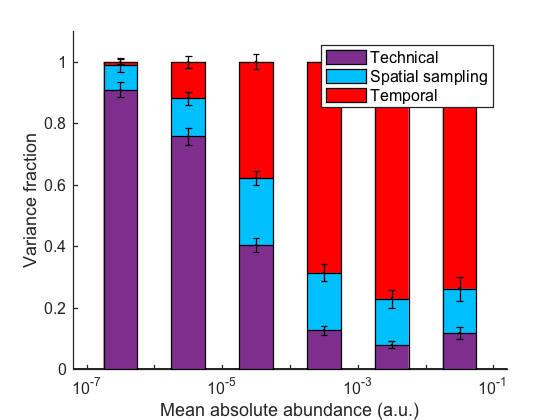

In [11]:
c = @cmu.colors; %For plotting colors

f1 = figure;

%Bin OTUs according to average absolute OTU abundance
b_w = 1; %bin width
bins = -7:b_w:-2; %bin boundaries
means_vf_T = [];
means_vf_S = [];
means_vf_N = [];
sem_vf_T = [];
sem_vf_S = [];
sem_vf_N = [];

%Calculate average variance fraction contributions within each abundance bin
for i = 1:length(bins)
    if i == length(bins)
        inds = find(log10(means) > bins(i));
    else
        inds = find(log10(means) > bins(i) & log10(means) < bins(i+1)); 
    end
    means_vf_T(i) = nanmean(vf_T(inds));
    means_vf_S(i) = nanmean(vf_S(inds));
    means_vf_N(i) = nanmean(vf_N(inds));
    sem_vf_T(i) = nanstd(vf_T(inds))/sqrt(length(inds));
    sem_vf_S(i) = nanstd(vf_S(inds))/sqrt(length(inds));
    sem_vf_N(i) = nanstd(vf_N(inds))/sqrt(length(inds));    
end

%Create bar graphs
vf_bar = [means_vf_N; means_vf_S; means_vf_T];

b2 = bar(bins+b_w/2,vf_bar','stacked');
b2(1).FaceColor = c('matlab purple');
b2(1).EdgeColor = c('black');
b2(1).LineWidth = 1;
b2(2).FaceColor = c('deep sky blue');
b2(2).EdgeColor = c('black');
b2(2).LineWidth = 1;
b2(3).FaceColor = c('red');
b2(3).EdgeColor = c('black');
b2(3).LineWidth = 1;
b2(3).BarWidth = .5;
hold on

%Create error bars
vf_error_N = means_vf_N;
vf_error_S = means_vf_N + means_vf_S;
vf_error_T = means_vf_N + means_vf_S + means_vf_T;

e2a = errorbar(bins+b_w/2,vf_error_N,sem_vf_N,'.');
e2a.Color = c('black');
e2a.MarkerSize = .1;
e2a.LineWidth = 1;
hold on
e2b = errorbar(bins+b_w/2,vf_error_S,sem_vf_S,'.');
e2b.Color = c('black');
e2b.MarkerSize = .1;
e2b.LineWidth = 1;
hold on
e2c = errorbar(bins+b_w/2,vf_error_T,sem_vf_T,'.');
e2c.Color = c('black');
e2c.MarkerSize = .1;
e2c.LineWidth = 1;

hold off

xlabel('Mean absolute abundance (a.u.)');
ylabel('Variance fraction');
set(gca,'xlim',[-7.2,-.8])
set(gca,'XTick',[-7:-1]);
set(gca,'XTickLabel',{'10^{-7}','','10^{-5}','','10^{-3}','','10^{-1}'});
set(gca,'ylim',[0,1.1])
set(gca,'YTick',[0,.25,.5,.75,1]);
set(gca,'YTick',[0,.2,.4,.6,.8,1]);
set(gca,'FontSize',12);
set(gca,'LineWidth',1); 
set(gca,'FontName','Arial');
box off
ll2 = legend([b2(1),b2(2),b2(3)],'Technical','Spatial sampling','Temporal');
ll2.FontSize = 12;


## Figure 2

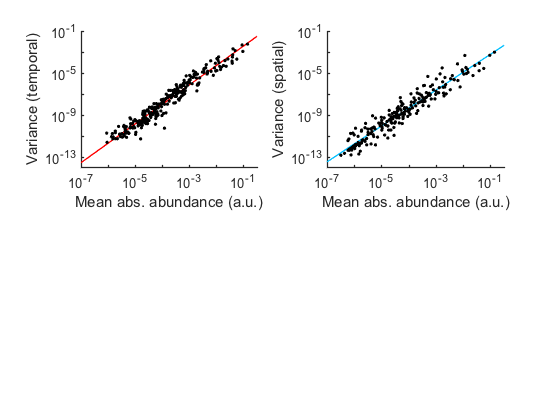

In [19]:
%% Taylor's Law

inds = find(means > 0 & vars_total > 0);
inds_T = find(means > 0 & vars_T > 0);
inds_S = find(means > 0 & vars_S > 0);
inds_N = find(means > 0 & vars_N > 0);

%Taylor's law exponents
[beta,s] = polyfit(log10(means(inds)),log10(vars_total(inds)),1);
[beta_T,s_T] = polyfit(log10(means(inds_T)),log10(vars_T(inds_T)),1);
[beta_S,s_S] = polyfit(log10(means(inds_S)),log10(vars_S(inds_S)),1);
[beta_N,s_P] = polyfit(log10(means(inds_N)),log10(vars_N(inds_N)),1);


f1 = figure;

subplot(2,2,1);

x = -7:.1:0;
p1a = plot(x,polyval(beta_T,x,'-'));
p1a.LineWidth = 1;
p1a.Color = c('red');
hold on
p1b = plot(log10(means), log10(vars_T),'.');
p1b.MarkerSize = 10;
p1b.Color = c('black');
hold off

set(gca,'xlim',[-7,-.5])
set(gca,'XTick',[-7:0]);
set(gca,'XTickLabel',{'10^{-7}','','10^{-5}','','10^{-3}','','10^{-1}',''});
set(gca,'ylim',[-14,-1])
set(gca,'YTick',[-13:2:-1]);
set(gca,'YTickLabel',{'10^{-13}','','10^{-9}','','10^{-5}','','10^{-1}'});
set(gca,'xscale','linear');
set(gca,'yscale','linear');
set(gca,'FontSize',10); 
set(gca,'LineWidth',1); 
set(gca,'FontName','Arial');
xlabel('Mean abs. abundance (a.u.)');
ylabel('Variance (temporal)');
box off

%% Taylor's law (spatial variance)
subplot(2,2,2);

x = -7:.1:0;
p2a = plot(x,polyval(beta_S,x,'-'));
p2a.LineWidth = 1;
p2a.Color = c('deep sky blue');
hold on
p2b = plot(log10(means), log10(vars_S),'.');
p2b.MarkerSize = 10;
p2b.Color = c('black');
hold off

set(gca,'xlim',[-7,-.5])
set(gca,'XTick',[-7:0]);
set(gca,'XTickLabel',{'10^{-7}','','10^{-5}','','10^{-3}','','10^{-1}',''});
set(gca,'ylim',[-14,-1])
set(gca,'YTick',[-13:2:-1]);
set(gca,'YTickLabel',{'10^{-13}','','10^{-9}','','10^{-5}','','10^{-1}'});
set(gca,'xscale','linear');
set(gca,'yscale','linear');
set(gca,'FontSize',10); 
set(gca,'LineWidth',1); 
set(gca,'FontName','Arial');
xlabel('Mean abs. abundance (a.u.)');
ylabel('Variance (spatial)');
box off





## Figure 3

### Plot distributions of total, temporal, spatial and temporal correlations across all highly abundant OTUs

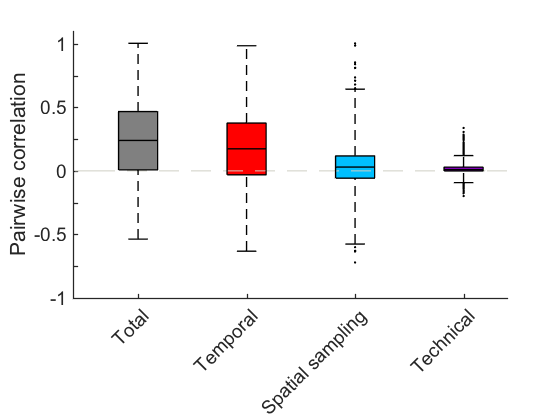

In [31]:
f1 = figure;

%% Boxplot of pairwise correlations (total, temporal, spsatial, technical)
cormat_total_triu = triu(cormat_total,1);
cormat_total_inds = find(cormat_total_triu); %Get inds of upper triangle
all_cors = [cormat_total(cormat_total_inds) cormat_T(cormat_total_inds) cormat_S(cormat_total_inds) cormat_N(cormat_total_inds)];

%Positive total correlations
positions = [1 1.25 1.5 1.75];
b1a = boxplot(all_cors,'Notch','off','BoxStyle','outline','PlotStyle','traditional',...
    'Widths',.09,'Symbol','k.','OutlierSize',2,'Whisker',3,'positions',positions,...
    'Color',c('black'));
set(b1a,'LineWidth',1);
h = findobj(gca,'Tag','Box');
patch(get(h(4),'XData'),get(h(4),'YData'),c('gray'),'FaceAlpha',1,'EdgeColor',c('gray'));
patch(get(h(3),'XData'),get(h(3),'YData'),c('red'),'FaceAlpha',1,'EdgeColor',c('red'));
patch(get(h(2),'XData'),get(h(2),'YData'),c('deep sky blue'),'FaceAlpha',1,'EdgeColor',c('deep sky blue'));
patch(get(h(1),'XData'),get(h(1),'YData'),c('dark violet'),'FaceAlpha',1,'EdgeColor',c('dark violet'));
hold on
p1 = plot(0:.1:2,zeros(size(0:.1:2)),'--');
p1.LineWidth = 0.5;
p1.Color = c('pastel gray');
hold on
b1a = boxplot(all_cors,'Notch','off','BoxStyle','outline','PlotStyle','traditional',...
    'Widths',.09,'Symbol','k.','OutlierSize',2,'Whisker',3,'positions',positions,...
    'Color',c('black'));
set(b1a,'LineWidth',1);
hold off

set(gca,'xlim',[.85,1.85])
set(gca,'ylim',[-1,1.1]);
set(gca,'XTick',positions);
set(gca,'XTickLabel',{'Total','Temporal','Spatial sampling','Technical'});
set(gca,'XTickLabelRotation',45);
set(gca,'YTick',[-1:.25:1]);
set(gca,'YTickLabel',{'-1','','-0.5','','0','','0.5','','1'});
ylabel('Pairwise correlation');
set(gca,'FontSize',14);
set(gca,'LineWidth',1);
set(gca,'FontName','Arial');
box off



### Calculate correlations by phlya

In [27]:
%% Find OTUs with high abundance;

%Abundance cutoff based on variance decomposition
high_inds = find(log10(means) > -4);

%Update means and variances
means = means(high_inds);
vars_total = vars_total(high_inds);
vars_T = vars_T(high_inds);
vars_S = vars_S(high_inds);
vars_N = vars_N(high_inds);
vf_T = vf_T(high_inds);
vf_S = vf_S(high_inds);
vf_N = vf_N(high_inds);

%Update correlation matrices
cormat_total = cormat_total(high_inds,high_inds);
cormat_T = cormat_T(high_inds,high_inds);
cormat_S = cormat_S(high_inds,high_inds);
cormat_N = cormat_N(high_inds,high_inds);

%Update taxa
tax = tax(high_inds);
otu_ids = otu_ids(high_inds);

%Update data
data_X = data_X(high_inds,:);
data_Y = data_Y(high_inds,:);
data_Z = data_Z(high_inds,:);



%% Covariance decomposition by phyla

%% Get phyla inds
bacter_inds = find(~cellfun(@isempty,strfind(tax,'Bacteroidetes')));
proteo_inds = find(~cellfun(@isempty,strfind(tax,'Proteobacteria')));
actino_inds = find(~cellfun(@isempty,strfind(tax,'Actinobacteria')));
firmi_inds = find(~cellfun(@isempty,strfind(tax,'Firmicutes')));

phyla_inds{1} = actino_inds;
phyla_inds{2} = bacter_inds;
phyla_inds{3} = firmi_inds;
phyla_inds{4} = proteo_inds;

%% Get correlations within and between phyla

cormat_phyla_total = [];
cormat_phyla_T = [];
cormat_phyla_S = [];
cormat_phyla_N = [];

for i = 1:size(phyla_inds,2);
    for j = 1:i
        
        %Get phyla indices
        phyla_inds_1 = phyla_inds{i};
        phyla_inds_2 = phyla_inds{j};
        
        %If i and j belong to same phyla
        if i == j
            
            %Get the intersection of indices in correlation matrix
            cross_cormat_total = cormat_total(phyla_inds_1,phyla_inds_2);
            cross_cormat_T = cormat_T(phyla_inds_1,phyla_inds_2);
            cross_cormat_S = cormat_S(phyla_inds_1,phyla_inds_2);
            cross_cormat_N = cormat_N(phyla_inds_1,phyla_inds_2);
            
            %Get upper triangle inds
            triu_inds = find(triu(cross_cormat_total,1));
            
            %Get average cross correlation and store
            cormat_phyla_total(i,j) = mean(cross_cormat_total(triu_inds));
            cormat_phyla_total(j,i) = mean(cross_cormat_total(triu_inds));
            cormat_phyla_T(i,j) = mean(cross_cormat_T(triu_inds));
            cormat_phyla_T(j,i) = mean(cross_cormat_T(triu_inds));
            cormat_phyla_S(i,j) = mean(cross_cormat_S(triu_inds));
            cormat_phyla_S(j,i) = mean(cross_cormat_S(triu_inds));
            cormat_phyla_N(i,j) = mean(cross_cormat_N(triu_inds));
            cormat_phyla_N(j,i) = mean(cross_cormat_N(triu_inds));
            
        else
            
            %Get the intersection of indices in correlation matrix
            cross_cormat_total = cormat_total(phyla_inds_1,phyla_inds_2);
            cross_cormat_T = cormat_T(phyla_inds_1,phyla_inds_2);
            cross_cormat_S = cormat_S(phyla_inds_1,phyla_inds_2);
            cross_cormat_N = cormat_N(phyla_inds_1,phyla_inds_2);
            
            %Get average cross correlation and store
            cormat_phyla_total(i,j) = mean(cross_cormat_total(:));
            cormat_phyla_total(j,i) = mean(cross_cormat_total(:));
            cormat_phyla_T(i,j) = mean(cross_cormat_T(:));
            cormat_phyla_T(j,i) = mean(cross_cormat_T(:));
            cormat_phyla_S(i,j) = mean(cross_cormat_S(:));
            cormat_phyla_S(j,i) = mean(cross_cormat_S(:));
            cormat_phyla_N(i,j) = mean(cross_cormat_N(:));
            cormat_phyla_N(j,i) = mean(cross_cormat_N(:));

        end
    end
end


### Plot results

> In colorGradient (line 32)
> In colorGradient (line 32)


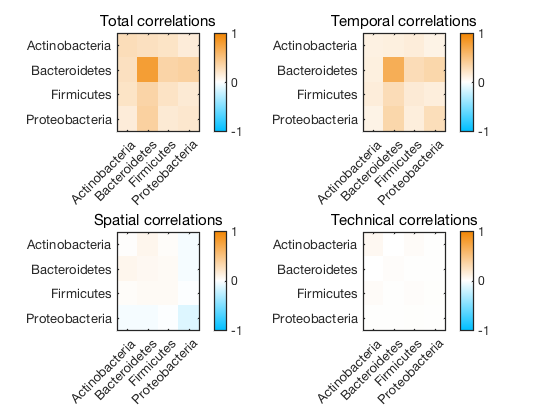

In [32]:
f2 = figure;

%Total correlations
subplot(2,2,1);

cmap1 = colorGradient(c('deep sky blue'),c('white'),500);
cmap2 = colorGradient(c('white'),c('tangerine'),500);
cmap = [cmap1;cmap2];
colormap(cmap);

p1 = imagesc(cormat_phyla_total);
p1.XData = 1:4;
p1.YData = 1:4;
set(gca, 'XTick', 1:4)
set(gca,'XTickLabel',{'Actinobacteria','Bacteroidetes','Firmicutes','Proteobacteria'});
set(gca,'XTickLabelRotation',45);
set(gca,'YTick', 1:4);
set(gca,'YTickLabel',{'Actinobacteria','Bacteroidetes','Firmicutes','Proteobacteria'});
title('Total correlations','FontWeight','Normal','FontSize',12);
set(gca,'FontSize',10);
set(gca,'LineWidth',1);
c1 = colorbar;
c1.LineWidth = 1;
caxis([-1,1]);
c1.Limits = [-1 1];

%Temporal correlations
subplot(2,2,2);

p2 = imagesc(cormat_phyla_T);
p2.XData = 1:4;
p2.YData = 1:4;
set(gca, 'XTick', 1:4)
set(gca,'XTickLabel',{'Actinobacteria','Bacteroidetes','Firmicutes','Proteobacteria'});
set(gca,'XTickLabelRotation',45);
set(gca,'YTick', 1:4);
set(gca,'YTickLabel',{'Actinobacteria','Bacteroidetes','Firmicutes','Proteobacteria'});
title('Temporal correlations','FontWeight','Normal','FontSize',12);
set(gca,'FontSize',10);
set(gca,'LineWidth',1);
c2 = colorbar;
c2.LineWidth = 1;
caxis([-1,1]);
c2.Limits = [-1 1];

%Spatial correlations
subplot(2,2,3);

p3 = imagesc(cormat_phyla_S);
p3.XData = 1:4;
p3.YData = 1:4;
set(gca, 'XTick', 1:4)
set(gca,'XTickLabel',{'Actinobacteria','Bacteroidetes','Firmicutes','Proteobacteria'});
set(gca,'XTickLabelRotation',45);
set(gca,'YTick', 1:4);
set(gca,'YTickLabel',{'Actinobacteria','Bacteroidetes','Firmicutes','Proteobacteria'});
title('Spatial correlations','FontWeight','Normal','FontSize',12);
set(gca,'FontSize',10);
set(gca,'LineWidth',1);
c3 = colorbar;
c3.LineWidth = 1;
caxis([-1,1]);
c3.Limits = [-1 1];

%Technical correlations
subplot(2,2,4);

p4 = imagesc(cormat_phyla_N);
p4.XData = 1:4;
p4.YData = 1:4;
set(gca, 'XTick', 1:4)
set(gca,'XTickLabel',{'Actinobacteria','Bacteroidetes','Firmicutes','Proteobacteria'});
set(gca,'XTickLabelRotation',45);
set(gca,'YTick', 1:4);
set(gca,'YTickLabel',{'Actinobacteria','Bacteroidetes','Firmicutes','Proteobacteria'});
title('Technical correlations','FontWeight','Normal','FontSize',12);
set(gca,'FontSize',10);
set(gca,'LineWidth',1);
c4 = colorbar;
c4.LineWidth = 1;
caxis([-1,1]);
c4.Limits = [-1 1];




